In [ ]:
#General Imports
import numpy as np
import pandas as pd
import pickle 
from os.path import join

#Preprocessing related imports 
from nltk.stem import WordNetLemmatizer
import gensim.parsing.preprocessing as gpp
import gensim.utils as gu


In [ ]:
#Load full dataset 
data_dir = "data/"
data = pd.read_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"), header=None, names=['Rating', 'Title', 'Review'])
display(data)


,Rating,Title,Review
0,NaN,Rating,ReviewFull
1,NaN,Rating,title review
2,344444.0,1,big letdown reading positive reviews book look...
3,818869.0,1,spectacularly bad seen worse comedy promising ...
4,1272908.0,1,monkees memories magic book poorly edited able...
...,...,...,...
49997,296748.0,5,required reading imaging able complete zelda g...
49998,600325.0,5,absinthe recipe book recipe kind compound poss...
49999,448336.0,5,dru hill song album good great songs probably ...
50000,1837701.0,5,good elo gets agree reviewers elo cds uderappr...


In [ ]:
# Check distribution of rating values as this is likely our target variable
data["Rating"].value_counts()

344444.0     1
1314478.0    1
2587451.0    1
2604507.0    1
577467.0     1
            ..
1610060.0    1
509607.0     1
1057848.0    1
2969366.0    1
567775.0     1
Name: Rating, Length: 50000, dtype: int64

In [ ]:
def preprocess_text(text):
    """Preprocesses a given string text input"""
    preprocs = [
        gpp.strip_tags, 
        gpp.strip_punctuation,
        gpp.strip_multiple_whitespaces,
        gpp.strip_numeric,
        gpp.remove_stopwords, 
        gpp.strip_short, 
    ]
    text = gu.to_unicode(text.lower().strip())
    for preproc in preprocs:
        text = preproc(text)
    return text

def lemmatize(text):
    """Lemmatizes a given string text input"""
    wnl = WordNetLemmatizer()
    return wnl.lemmatize(text)  

In [ ]:
# Combining both the above functions into a single preprocessing function
preprocess = lambda text: lemmatize(preprocess_text(str(text)))

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Create the ReviewFull data column
data["ReviewFull"] = data["Title"] + " " + data["Review"]
data = data.drop(["Title", "Review"], axis=1)

In [ ]:
# Apply the preprocessing to the textual data
data["ReviewFull"] = data["ReviewFull"].apply(preprocess)
data.head()

,Rating,ReviewFull
0,NaN,rating reviewfull
1,NaN,rating title review
2,344444.0,big letdown reading positive reviews book look...
3,818869.0,spectacularly bad seen worse comedy promising ...
4,1272908.0,monkees memories magic book poorly edited able...


In [ ]:
# Save the data
data.to_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"))

In [ ]:
# Save the data
data.to_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"))


In [ ]:
downsampled = data.groupby("Rating").sample(10000).
display(downsampled)

SyntaxError: ignored

In [ ]:
# Ensure equal distribution of targets
downsampled["Rating"].value_counts()

NameError: ignored

In [ ]:
# Save data
downsampled.to_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"))

NameError: ignored

In [ ]:
# General Imports
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from os.path import join

# EDA related imports
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
# Load the downsampled preprocessed data
data_dir = "data/"
data = pd.read_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"))[["Rating", "ReviewFull"]]
data["ReviewFull"] = data["ReviewFull"].apply(str)
display(data)

,Rating,ReviewFull
0,NaN,rating reviewfull
1,NaN,rating title review
2,344444.0,big letdown reading positive reviews book look...
3,818869.0,spectacularly bad seen worse comedy promising ...
4,1272908.0,monkees memories magic book poorly edited able...
...,...,...
49997,296748.0,required reading imaging able complete zelda g...
49998,600325.0,absinthe recipe book recipe kind compound poss...
49999,448336.0,dru hill song album good great songs probably ...
50000,1837701.0,good elo gets agree reviewers elo cds uderappr...


In [ ]:
# Define function to extract a string's sentiment
find_sentiment = lambda text: TextBlob(text).sentiment.polarity

# Create new column in dataframe
data["sentiment"] = data["ReviewFull"].apply(find_sentiment)

In [ ]:
data

,Rating,ReviewFull,sentiment
0,NaN,rating reviewfull,0.000000
1,NaN,rating title review,0.000000
2,344444.0,big letdown reading positive reviews book look...,-0.064899
3,818869.0,spectacularly bad seen worse comedy promising ...,-0.070308
4,1272908.0,monkees memories magic book poorly edited able...,0.085470
...,...,...,...
49997,296748.0,required reading imaging able complete zelda g...,0.248909
49998,600325.0,absinthe recipe book recipe kind compound poss...,0.475000
49999,448336.0,dru hill song album good great songs probably ...,0.437500
50000,1837701.0,good elo gets agree reviewers elo cds uderappr...,0.351563


Mean Sentiment for Rating 1: nan
Mean Sentiment for Rating 2: nan
Mean Sentiment for Rating 3: nan
Mean Sentiment for Rating 4: nan
Mean Sentiment for Rating 5: nan


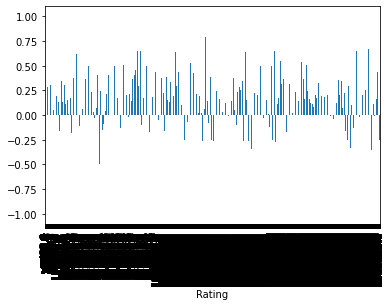

In [ ]:
# Plot mean sentiment against rating 
for rating in range(1,6):
    print(f"Mean Sentiment for Rating {rating}: {data[data['Rating'] == rating]['sentiment'].mean()}")

data.groupby("Rating")["sentiment"].mean().plot(kind="bar")

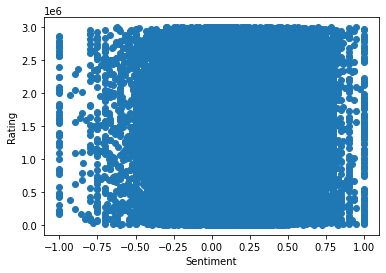

In [ ]:
plt.scatter(data["sentiment"], data["Rating"])
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()


In [ ]:
# Function for finding n nost common words in a series
num_most_common = 25
find_n_most_common = lambda text, n: Counter(' '.join(text).split()).most_common(n)
most_common = data.groupby("Rating")["ReviewFull"].apply(lambda x: find_n_most_common(x, num_most_common))

for rating in range(1,6):
    idx = rating - 1
    print(f"Most Common Words for Rating {rating} sorted by sentiment: ")   
    # Display the most common words in each rating sorted by sentiment 
    print(list(sorted(most_common.iloc[idx], key=lambda x: TextBlob(x[0]).sentiment.polarity)))
    print("\n")

Most Common Words for Rating 1 sorted by sentiment: 
[('ugly', 1), ('remote', 1), ('player', 2), ('wish', 1), ('change', 1), ('things', 1), ('overall', 1), ('works', 1), ('set', 1), ('display', 1), ('orange', 1), ('lettering', 1), ('reminds', 1), ('alarm', 1), ('clock', 1), ('displays', 1), ('minutes', 1), ('seconds', 1), ('lack', 1), ('universal', 1), ('drawback', 1), ('easy', 1), ('good', 1), ('fairly', 1), ('great', 1)]


Most Common Words for Rating 2 sorted by sentiment: 
[('wave', 2), ('record', 2), ('artists', 2), ('read', 1), ('prior', 1), ('reviews', 1), ('buying', 1), ('appears', 1), ('collection', 1), ('singles', 1), ('cover', 1), ('versions', 1), ('sung', 1), ('starlite', 1), ('singers', 1), ('description', 1), ('says', 1), ('implying', 1), ('total', 1), ('garbage', 1), ('spot', 1), ('new', 2), ('true', 1), ('original', 1), ('bright', 1)]


Most Common Words for Rating 3 sorted by sentiment: 
[('waste', 1), ('half', 1), ('adam', 2), ('sandler', 2), ('time', 1), ('people', 1

In [ ]:
def display_topics(model, words, num_top_words):
    """Function to display the top num_top_words topic words given an NMF model and word vocabulary"""
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([words[i]
                          for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [ ]:
def display_topics(model, words, num_top_words):
    """Function to display the top num_top_words topic words given an NMF model and word vocabulary"""
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([words[i]
                          for i in topic.argsort()[:-num_top_words - 1:-1]]))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abilities,ability,able,absolute,absolutely,absurd,abuse,academic,academy,accent,...,youth,youtube,yrs,yuck,zen,zero,zipper,zombie,zone,zoom
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.169885,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.141663,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,0.0,0.0,0.110783,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49999,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Fit the NMF model and generate top 5 topics
num_top_words = 10
num_topics = 5
nmf = NMF(n_components=num_topics, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_words, num_top_words)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


Topic 0:
product great good use work price bought quality time works
Topic 1:
book read books reading story author good characters written interesting
Topic 2:
movie film watch movies story good dvd bad acting like
Topic 3:
album songs music like song good best love sound band
Topic 4:
game fun play games graphics played playing like good buy


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
num_top_words = 10
num_topics = 10
nmf = NMF(n_components=num_topics, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_words, num_top_words)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


Topic 0:
use work like time bought money buy got little old
Topic 1:
book reading information author written pages recommend interesting people like
Topic 2:
movie film movies watch acting bad seen like story watching
Topic 3:
album songs music song like best listen band love sound
Topic 4:
game fun play games graphics played playing like buy best
Topic 5:
great love price works easy fun recommend wonderful perfect awesome
Topic 6:
good pretty price quality overall better little bad nice lot
Topic 7:
read story books characters series reading novel love interesting plot
Topic 8:
dvd quality video player film season version play dvds episodes
Topic 9:
product amazon received price recommend item works order products ordered


In [ ]:
import tensorflow_text

In [ ]:
pip install tensorflow_text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 39.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully 

In [ ]:
# General Imports
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from os.path import join
from tqdm import tqdm

# BERT Specific Imports
import tensorflow as tf
import tensorflow_hub as hub 
import tensorflow_text as text 

In [ ]:
# Preprocessing layer to generate the tokenized sentences and input mask
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
# Encoder layer which generates word-level and setence-level 768-dimensional text embeddings 
bert = hub.KerasLayer('https://tfhub.dev/google/experts/bert/wiki_books/sst2/2')

In [ ]:
# Load the downsampled data
data_dir = "data"
data = pd.read_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csv"), names=['Rating', 'Title', 'Review'])
data = data.iloc[1:, :].reset_index(drop=True)
data["Rating"] = data["Rating"].apply(int) 
data 

,Rating,Title,Review
0,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
1,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
2,2,Oh dear,I was excited to find a book ostensibly about ...
3,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."
4,2,Incorrect Disc,"I love the style of this, but after a couple y..."
...,...,...,...
649994,5,Pretty Cool!,We got it for our mom's birthday. She LOVES it...
649995,5,great cd,"this cd is very good. i especially love ""cats ..."
649996,2,An interesting look into Boston's comedy clubs,This was a good documentary on the history of ...
649997,5,Du vol...pour les cowboys!,Avez-vous déjà vu un CD double et un DVD avec ...


In [ ]:
# Load the downsampled data
data_dir = "data"
data = pd.read_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csv"), names=['Rating', 'Title', 'Review'])
data = data.iloc[1:, :].reset_index(drop=True)
data["Rating"] = data["Rating"].apply(int) 
data 

In [ ]:
# Create train, val, and test sets
train_data = shuffle(data)[:10000]
X = train_data["Review"].to_numpy()
y = train_data["Rating"].to_numpy() - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(f"X_train: {X_train.shape} | X_val: {X_val.shape} | X_test: {X_test.shape} | \n" +
    f"y_train: {y_train.shape} | y_val: {y_val.shape} | y_test: {y_test.shape} | ")

X_train: (7200,) | X_val: (1800,) | X_test: (1000,) | 
y_train: (7200,) | y_val: (1800,) | y_test: (1000,) | 


In [ ]:
# Generate train embeddings
def generate_bert_embeddings(data):
    """Generate the BERT embeddings for a given Series/list of senetences"""
    return bert(bert_preprocess(data))['pooled_output'] 

def generate_embeddings_list(data):
    """Generate embeddings of parts of list individually and then concatenate. 
    Create to overcome performance issues."""
    factor = int(data.shape[0]/100)
    embeddings_list = []
    for i in tqdm(range(0, 100)):
        embeddings_list.append(generate_bert_embeddings(X[factor*i: factor*(i+1)]))
    return embeddings_list
    
el = generate_embeddings_list(X_train)
embeddings = tf.stack(el)
embeddings

100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


<tf.Tensor: shape=(100, 72, 768), dtype=float32, numpy=
array([[[ 0.0900616 , -0.4532172 , -0.652321  , ..., -0.54165864,
         -0.9588632 ,  0.31585604],
        [ 0.51571536,  0.25872046,  0.06516591, ...,  0.42662263,
         -0.8764822 ,  0.05033148],
        [-0.2815941 ,  0.3477749 ,  0.4439234 , ...,  0.69486296,
         -0.0643404 , -0.446399  ],
        ...,
        [ 0.753392  , -0.28890267, -0.72111475, ..., -0.24461575,
         -0.72481364,  0.19374281],
        [ 0.40570992, -0.09468772, -0.32857513, ..., -0.43947577,
         -0.7170279 ,  0.40430045],
        [ 0.11421046, -0.11081295, -0.17730817, ..., -0.8136289 ,
         -0.87226087,  0.02638107]],

       [[ 0.535285  ,  0.2176286 , -0.73231095, ..., -0.21199219,
         -0.9305786 ,  0.6611189 ],
        [ 0.84777546,  0.31314522, -0.6616786 , ..., -0.7942632 ,
         -0.61793417, -0.18193899],
        [ 0.5037986 ,  0.03910458, -0.0196217 , ...,  0.28836587,
         -0.47050852, -0.62360364],
        ...

In [ ]:
embeddings = tf.reshape(embeddings, (7200, 768))

In [ ]:
# Save train embeddings
import pickle
pickle.dump(embeddings, open(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"), "wb"))
pickle.dump(y_train, open(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csv"), "wb"))

In [ ]:
# General Imports
from os.path import join
import multiprocessing
import pickle
import numpy as np
import pandas as pd

# Classifier Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold


SEED = 0
CPU_COUNT = multiprocessing.cpu_count() - 2

In [ ]:
# Wrapper class for a general SKLearn classifier
class Classifier():
    def __init__(self, classifier_name, classifier, init_params, param_grid, seed):
        self.classifier_name = classifier_name
        self.seed = seed
        self.param_grid = param_grid

        #Init classifier
        self.init_params = init_params
        self.init_params["random_state"] = seed
        self.classifier = classifier(**self.init_params) if init_params else classifier(random_state=seed)

        #Dict to explicitly store best stats
        self.best_stats = {"best_params": None, "best_score": None}
    
    def fit(self, X, y):
        print(f"Fitting {self.classifier_name} model...")
        self.classifier.fit(X, y)

    def predict(self, X):
        return self.classifier.predict(X)
    
    def evaluate(self, X_test, y_test):
        return self.classifier.score(X_test, y_test)
    
    def tune_hyperparameters(self, X, y):
        print(f"Tuning hyperparameters for {self.classifier_name} model...")
        cv = KFold(n_splits=5, random_state=self.seed, shuffle=True)
        gscv = GridSearchCV(self.classifier, self.param_grid, scoring="accuracy", cv=cv, n_jobs=-1)
        gscv.fit(X, y)
        self.classifier = gscv.best_estimator_
        self.best_stats["best_params"], self.best_stats["best_score"] = gscv.best_params_, gscv.best_score_

In [ ]:
# Loading train, val, and test data (BERT text embeddings and corresponding labels)
data_dir = "data/"

X_train = pickle.load(open(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"), "rb")).numpy()
y_train = pickle.load(open(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csv"), "rb"))
X_val = pickle.load(open(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csvl"), "rb")).numpy()
y_val = pickle.load(open(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csv"), "rb"))
X_test = pickle.load(open(join(data_dir, "/content/drive/MyDrive/New folder (3)/train.csv"), "rb")).numpy()
y_test = pickle.load(open(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csv"), "rb"))

# Combine train and validation set into one as we use K-Fold cross validation
X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])

print(f"X_train: {X_train.shape} | X_test: {X_test.shape} | \n" +
    f"y_train: {y_train.shape} | y_test: {y_test.shape} | ")

X_train: (14400, 768) | X_test: (7200, 768) | 
y_train: (14400,) | y_test: (7200,) | 


In [ ]:
# Create list of classifiers
SEED = 0
param_grids = []

# Create parameter grids for hyperparameter tuning
rf_param_grid = {"max_features": ["sqrt", "log2"],
                    "max_depth" : [3, 6, 8],
                    "criterion" :["gini", "entropy"]     ,
                    "n_jobs": [-1]}

lsvc_param_grid = {"penalty": ["l2"],
                   "C": [0.0001, 0.01, 1.0, 10, 100]}

lreg_param_grid = {'penalty' : ['l1', 'l2'],
                     'C' : np.logspace(-4, 4, 20)}

clf_names = ["RandomForest", "LinearSVC", "LogisticRegression"]
clfs = [RandomForestClassifier, LinearSVC, LogisticRegression]
init_params = [{'n_jobs': CPU_COUNT}, {'multi_class': 'crammer_singer'}, {'multi_class': 'multinomial', 'solver': 'lbfgs'}]
param_grids.extend([rf_param_grid, lsvc_param_grid, lreg_param_grid])


classifiers = [Classifier(name, model, {}, param_grid, SEED) 

In [ ]:
# Fit classifiers
[clf.fit(X_train, y_train) for clf in classifiers]

In [ ]:
# Score classifier
[clf.evaluate(X_test, y_test) for clf in classifiers]

In [ ]:
# Save models
models_dir = "models/"
for clf in classifiers:
    pickle.dump(clf, open(join(models_dir, f"{clf.classifier_name}.pkl"), "wb")) 


In [ ]:
# General Imports
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from os.path import join

# NN-related imports
import tensorflow as tf
import tensorflow_hub as hub 
import tensorflow_text as text 

print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert = hub.KerasLayer('https://tfhub.dev/google/experts/bert/wiki_books/sst2/2')


In [ ]:
data_dir = "data/"
data = pd.read_csv(join(data_dir, "/content/drive/MyDrive/New folder (3)/test.csv"))[["Rating", "Review"]]
data["Review"] = data["Review"].apply(str)
display(data)

UnicodeDecodeError: ignored

In [ ]:
def build_model():
    """Build model with custom classifier stacked on top of BERT encoder"""
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='txt_input')
    bert_input = bert_preprocess(text_input)
    bert_output = bert(bert_input)
    clf_input = bert_output['pooled_output']
    clf = tf.keras.layers.Dropout(0.1)(clf_input) 
    clf = tf.keras.layers.Dense(384, activation='sigmoid', kernel_regularizer='l2')(clf)
    clf = tf.keras.layers.Dropout(0.1)(clf)
    clf = tf.keras.layers.Dense(5, activation='sigmoid', name='clf')(clf)
    return tf.keras.Model(text_input, clf)

model = build_model() 

NameError: ignored

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 txt_input (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['txt_input[0][0]']              
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.metrics.SparseCategoricalAccuracy()]
optimizer = tf.keras.optimizers.Adam()

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

NameError: ignored

In [ ]:
train_data = shuffle(data)[:10000]
X = train_data["Review"].to_numpy()
y = train_data["Rating"].to_numpy() - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(f"X_train: {X_train.shape} | X_val: {X_val.shape} | X_test: {X_test.shape} | \n" +
    f"y_train: {y_train.shape} | y_val: {y_val.shape} | y_test: {y_test.shape} | ")

X_train: (7200,) | X_val: (1800,) | X_test: (1000,) | 
y_train: (7200,) | y_val: (1800,) | y_test: (1000,) | 


In [ ]:
EPOCHS = 25
BATCH_SIZE = 64
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))

Epoch 1/25


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


113/113 [==============================] - 110s 876ms/step - loss: 3.0155 - sparse_categorical_accuracy: 0.4542 - val_loss: 1.5299 - val_sparse_categorical_accuracy: 0.4311
Epoch 2/25
113/113 [==============================] - 102s 909ms/step - loss: 1.3174 - sparse_categorical_accuracy: 0.4849 - val_loss: 1.2568 - val_sparse_categorical_accuracy: 0.4783
Epoch 3/25
113/113 [==============================] - 100s 890ms/step - loss: 1.2175 - sparse_categorical_accuracy: 0.4921 - val_loss: 1.2263 - val_sparse_categorical_accuracy: 0.4822
Epoch 4/25
113/113 [==============================] - 102s 904ms/step - loss: 1.2074 - sparse_categorical_accuracy: 0.4872 - val_loss: 1.1932 - val_sparse_categorical_accuracy: 0.5006
Epoch 5/25
113/113 [==============================] - 100s 889ms/step - loss: 1.2205 - sparse_categorical_accuracy: 0.4858 - val_loss: 1.2124 - val_sparse_categorical_accuracy: 0.4722
Epoch 6/25
113/113 [==============================] - 102s 903ms/step - loss: 1.2068 - spar

In [ ]:
import tensorflow as tf

In [ ]:
tf.saved_models.save(model, "models/bert2")

AttributeError: ignored